In [5]:
import pandas as pd
import networkx as nx
import numpy as np
import re
import matplotlib.pyplot as plt
from fa2 import ForceAtlas2
import json
from scipy import stats
import math
from scipy.special import zeta

In [6]:
H113 = pd.read_csv("H113.csv")
H113["congressnumber"] = 113
H114 =pd.read_csv("H114.csv")
H114["congressnumber"] = 114
H115 = pd.read_csv("H115.csv")
H115["congressnumber"] = 115

In [8]:
G = nx.DiGraph()
members = H113["WikiPageName"].unique()
for idx,member in enumerate(members):
    string = member.replace("_", " ")
    G.add_node(string, State = H113.loc[H113["WikiPageName"]==member].values[0][2], Party = H113.loc[H113["WikiPageName"]==member].values[0][1])
    members[idx] = string
members_redirect = []
for member in members:
    string = member.replace(" ", "_")
    file = open("../H113/"+string+"_redirects.json","r")
    #strings = file.readlines()[0]
    data =  json.load(file)
    members_redirect.append([member, [item["title"] for item in data["query"]["backlinks"]]])
for member in members:
    string = member.replace(" ", "_")
    with open("../H113/"+string) as f:
        string = str(f.readlines())
    match = re.findall(r'\[\[(.+?)]]', string)
    matchlink = list(set(match).intersection(members))
    linklist = [(member,link) for link in matchlink]
    for item in members_redirect:
        matchlink = list(set(match).intersection(item[1]))
        if matchlink == []:
            pass
        elif item[0] == member:
            pass
        else:
            linklist.append((member,item[0]))
    G.add_edges_from(linklist)

In [9]:
forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=False,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=1.0,

                          # Performance
                          jitterTolerance=1.0,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=1.2,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=0.1,
                          strongGravityMode=False,
                          gravity=10.0,

                          # Log
                          verbose=True)
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=4000)

100%|██████████| 4000/4000 [00:09<00:00, 447.74it/s]

('BarnesHut Approximation', ' took ', '2.35', ' seconds')
('Repulsion forces', ' took ', '6.47', ' seconds')
('Gravitational forces', ' took ', '0.06', ' seconds')
('Attraction forces', ' took ', '0.04', ' seconds')
('AdjustSpeedAndApplyForces step', ' took ', '0.34', ' seconds')


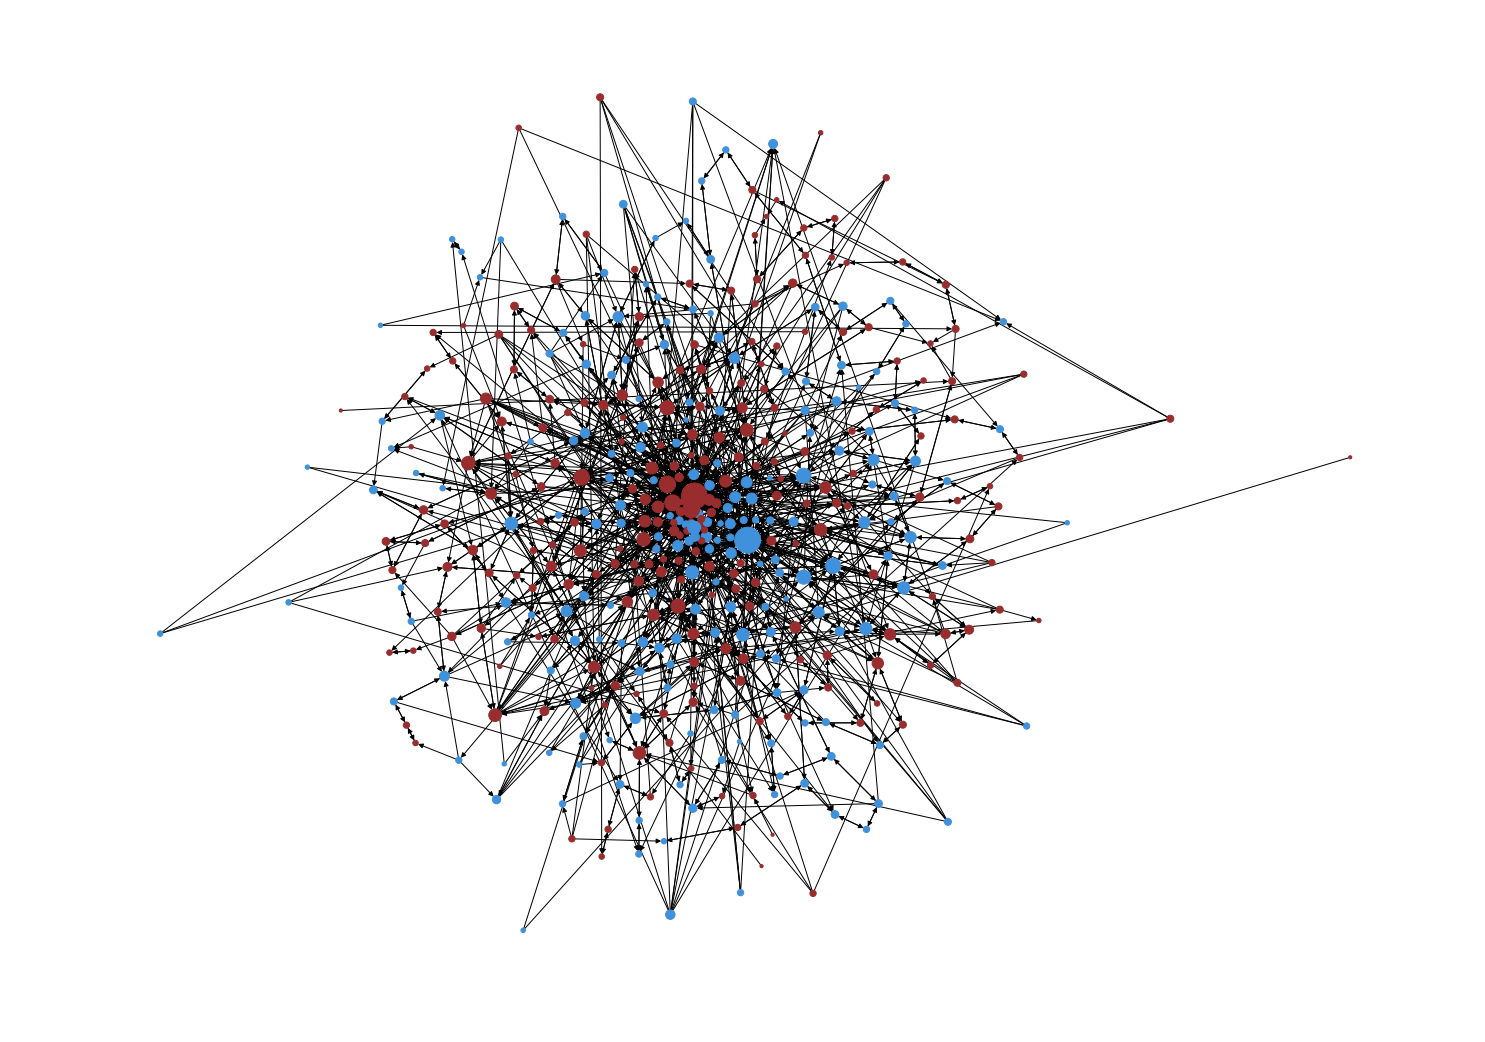

In [10]:
fig = plt.figure(figsize=(20,14)) 
dicts = dict(G.nodes())
colors = ["#4091db" if dicts[item]["Party"]=="Democratic" else "#992D2D" for item in list(G.nodes())]
sizes = [10*dict(G.degree())[rep] for rep in list(G.nodes())]
nx.draw(G, positions, node_size=sizes, node_color = colors, with_labels=False)
plt.show()

In [11]:
sorted(list(G.in_degree()),key=lambda x: x[1])

[('Andr\xc3\xa9 Carson', 0),
 ('George Miller (California politician)', 0),
 ('Chris Stewart (politician)', 0),
 ('Paul Cook (politician)', 0),
 ('Andy Barr (American politician)', 0),
 ('Patrick Murphy (Florida politician)', 0),
 ('Roger Williams (American politician)', 0),
 ('Mike Rogers (Alabama politician)', 0),
 ('John Delaney (Maryland politician)', 0),
 ('David Joyce (politician)', 0),
 ('Richard Hudson (American politician)', 0),
 ('John Barrow (U.S. politician)', 0),
 ('Scott Perry (politician)', 0),
 ('David Price (American politician)', 0),
 ('Mike Kelly (Pennsylvania politician)', 0),
 ('Tim Ryan (politician)', 0),
 ('Frank Wolf (politician)', 0),
 ('Chris Collins (American politician)', 0),
 ('Jeff Miller (Florida politician)', 0),
 ('Austin Scott (politician)', 0),
 ('Jeff Duncan (politician)', 0),
 ('Tom Price (American politician)', 0),
 ('Michael Grimm (politician)', 0),
 ('David Scott (Georgia politician)', 0),
 ('Filemon Vela Jr.', 0),
 ('Mark Meadows (North Carolina

In [12]:
G.in_edges("Nancy Pelosi")

InEdgeDataView([('John Garamendi', 'Nancy Pelosi'), ('Jim Moran', 'Nancy Pelosi'), ('Peter DeFazio', 'Nancy Pelosi'), ('Steve Cohen', 'Nancy Pelosi'), ('Jackie Speier', 'Nancy Pelosi'), ('Luis Guti\xc3\xa9rrez', 'Nancy Pelosi'), ('Darrell Issa', 'Nancy Pelosi'), ('G. K. Butterfield', 'Nancy Pelosi'), ('Alcee Hastings', 'Nancy Pelosi'), ('John Fleming (American politician)', 'Nancy Pelosi'), ('Eric Cantor', 'Nancy Pelosi'), ('Betty McCollum', 'Nancy Pelosi'), ('Paul Cook (politician)', 'Nancy Pelosi'), ('Elijah Cummings', 'Nancy Pelosi'), ('Fred Upton', 'Nancy Pelosi'), ('Lacy Clay', 'Nancy Pelosi'), ('Adam Schiff', 'Nancy Pelosi'), ('Steven Palazzo', 'Nancy Pelosi'), ('Doris Matsui', 'Nancy Pelosi'), ('Jim Clyburn', 'Nancy Pelosi'), ('Frank Pallone', 'Nancy Pelosi'), ('Mike Honda', 'Nancy Pelosi'), ('Steny Hoyer', 'Nancy Pelosi'), ('Peter T. King', 'Nancy Pelosi'), ('John Boehner', 'Nancy Pelosi'), ('John F. Tierney', 'Nancy Pelosi'), ('John Yarmuth', 'Nancy Pelosi'), ('Keith Ellison',

- Why do you think I want you guys to use a directed graph? Could have we used an undirected graph instead?

I think that we could use undirected and not differ between links from and to pages but a directed graph is more represantive of the actual structure of the connections.

- What is the total number of nodes in the network? What is the total number of links? The density of the network?

In [13]:
G.number_of_edges()

1476

In [14]:
G.number_of_nodes()

444

In [15]:
nx.density(G)

0.007504118113598926

- What are the average, median, mode, minimum and maximum value of the in-degree? And of the out-degree? How do you intepret the results?

As you can see below, the mode, mean and median is equiavalent for the two distributions however the max differs a lot. This means that the distribution will 

In [16]:
in_degree = dict(G.in_degree()).values()
print np.mean(in_degree)
print np.median(in_degree)
print stats.mode(in_degree)
print min(in_degree)
print max(in_degree)
out_degree = dict(G.out_degree()).values()
print np.mean(out_degree)
print np.median(out_degree)
print stats.mode(out_degree)
print min(out_degree)
print max(out_degree)

3.324324324324324
3.0
ModeResult(mode=array([2]), count=array([119]))
0
57
3.324324324324324
3.0
ModeResult(mode=array([2]), count=array([122]))
0
18


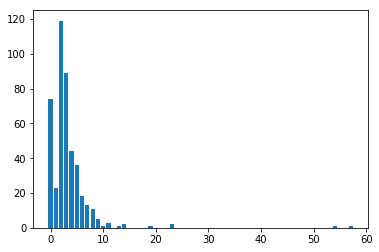

In [17]:
itera = list(range(min(in_degree)-1,max(in_degree)+1))
newitera = [x+0.5 for x in itera]
hist = np.histogram(in_degree,bins=newitera)
plt.bar(list(range(min(in_degree),max(in_degree)+1)),hist[0],align='center')
plt.show()

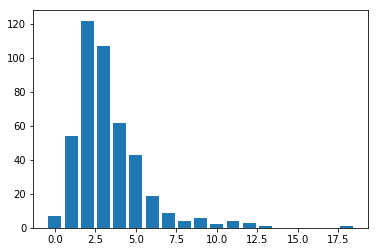

In [18]:
itera = list(range(min(out_degree)-1,max(out_degree)+1))
newitera = [x+0.5 for x in itera]
hist = np.histogram(out_degree,bins=newitera)
plt.bar(list(range(min(out_degree),max(out_degree)+1)),hist[0],align='center')
plt.show()

In [19]:
#Defining functions to plot against a random network and a scale free network
def PoissDegree(ks,avg):
    return [np.exp(-avg)*avg**k/math.factorial(int(k)) for k in ks]
def ScaleFreeDegree(ks,gamma):
    return [k**(-gamma)/zeta(gamma) for k in ks]

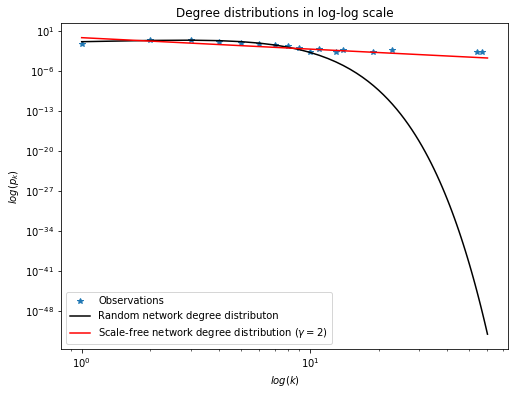

In [20]:
#Plotting the in-degree distribution
itera = list(range(min(in_degree)-1,max(in_degree)+1))
newitera = [x+0.5 for x in itera]
hist = np.histogram(in_degree,bins=newitera,density=True)
fig = plt.figure(figsize=(8,6))
plt.title("Degree distributions in log-log scale")
plt.ylabel("$log(p_k)$")
plt.xlabel("$log(k)$")
plt.loglog(list(range(min(in_degree),max(in_degree)+1)),hist[0],"*")#,align='center')
#Making variables from both random and scale-free network in relevant range
avg = np.mean(in_degree)
ks = np.linspace(1,60,60)
plt.loglog(ks,PoissDegree(ks,avg),"-",color="k")
plt.loglog(ks,ScaleFreeDegree(ks,2),"-",color="r")
plt.legend(["Observations","Random network degree distributon","Scale-free network degree distribution ($\gamma = 2$)"])
plt.show()

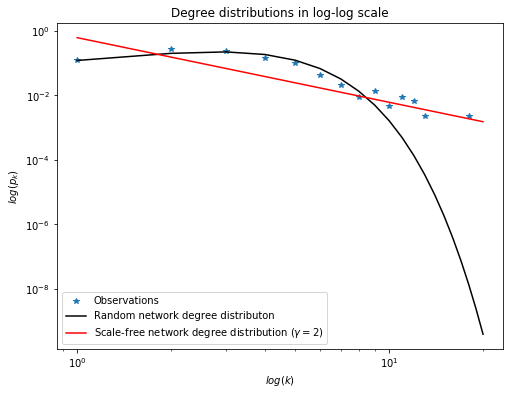

In [21]:
#Plotting the in-degree distribution
itera = list(range(min(out_degree)-1,max(out_degree)+1))
newitera = [x+0.5 for x in itera]
hist = np.histogram(out_degree,bins=newitera,density=True)
fig = plt.figure(figsize=(8,6))
plt.title("Degree distributions in log-log scale")
plt.ylabel("$log(p_k)$")
plt.xlabel("$log(k)$")
plt.loglog(list(range(min(out_degree),max(out_degree)+1)),hist[0],"*")#,align='center')
#Making variables from both random and scale-free network in relevant range
avg = np.mean(in_degree)
ks = np.linspace(1,20,20)
plt.loglog(ks,PoissDegree(ks,avg),"-",color="k")
plt.loglog(ks,ScaleFreeDegree(ks,2),"-",color="r")
plt.legend(["Observations","Random network degree distributon","Scale-free network degree distribution ($\gamma = 2$)"])
plt.show()

The in degree network is a lot closer to a scale free network compared to the out degree. The both have close tendencies for their large hubs but their initial distribution follows the poisson distribution nicely.

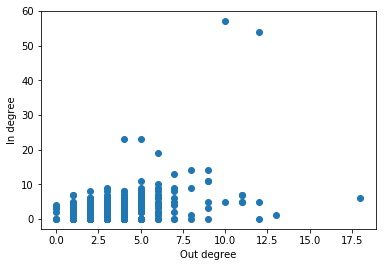

In [22]:
plt.scatter(out_degree,in_degree)
plt.xlabel("Out degree")
plt.ylabel("In degree")
plt.show()

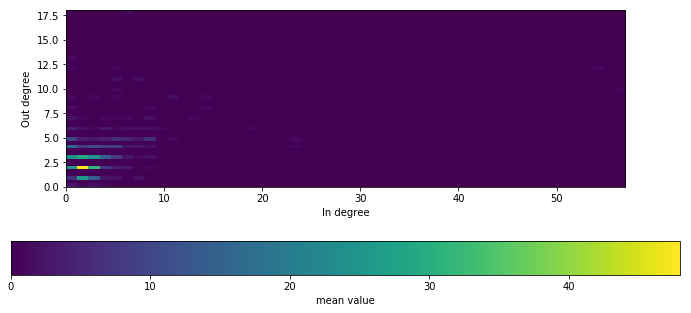

In [23]:
y = out_degree
x = in_degree
heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
fig, ax = plt.subplots(figsize=(12,5))
im = ax.imshow(heatmap.T, extent=extent,origin='lower')
#ax.set_colorbarlabel()
ax.set_ylabel("Out degree")
ax.set_xlabel("In degree")
fig.colorbar(im, orientation="horizontal", pad=0.2, label ='mean value' )
plt.show()

In [24]:
listofgraphs = list(nx.weakly_connected_component_subgraphs(G))

In [25]:
mainG = listofgraphs[0]

In [26]:
undirG = mainG.to_undirected()

In [27]:
sorted(nx.betweenness_centrality(mainG).iteritems(), key=lambda (k,v): (v,k))[-5:]

[('Steny Hoyer', 0.04758484104647746),
 ('Henry Waxman', 0.051527310532986925),
 ('Justin Amash', 0.062082510675727405),
 ('Nancy Pelosi', 0.1621910051148781),
 ('John Boehner', 0.16540913471289745)]

In [28]:
sorted(nx.eigenvector_centrality(mainG).iteritems(), key=lambda (k,v): (v,k))[-5:]

[('Sander Levin', 0.24626611501373447),
 ('Steny Hoyer', 0.2638266310794475),
 ('John Dingell', 0.308349482335122),
 ('John Boehner', 0.3721735665355241),
 ('Nancy Pelosi', 0.43489437840341394)]

In [29]:
sorted(nx.eigenvector_centrality(mainG.reverse()).iteritems(), key=lambda (k,v): (v,k))[-5:]

[('Walter B. Jones Jr.', 0.16648520039971906),
 ('John Boehner', 0.1693314459712934),
 ('Kevin McCarthy (California politician)', 0.1736341910464545),
 ('Brad Sherman', 0.17739464812410066),
 ('Michele Bachmann', 0.21074470104398377)]

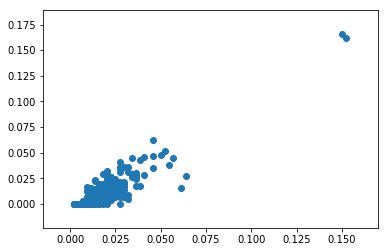

In [30]:
plt.scatter(nx.degree_centrality(mainG).values(),nx.betweenness_centrality(mainG).values())
plt.show()

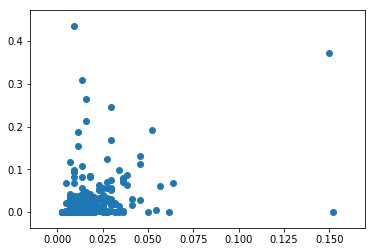

In [31]:
plt.scatter(nx.degree_centrality(mainG).values(),nx.eigenvector_centrality(mainG).values())
plt.show()

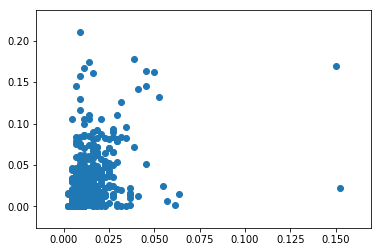

In [32]:
plt.scatter(nx.degree_centrality(mainG).values(),nx.eigenvector_centrality(mainG.reverse()).values())
plt.show()

In [33]:
nx.degree_assortativity_coefficient(undirG)

0.0015884898239619302

In [34]:
nx.average_shortest_path_length(mainG)

4.095975056689342

In [35]:
np.log(len(mainG.nodes()))/np.log(np.mean(dict(mainG.degree()).values()))

3.202748948538452

In [36]:
np.log(np.log(len(mainG.nodes())))

1.8064912345199307

In [37]:
np.log(len(mainG.nodes()))/np.log(np.log(len(mainG.nodes())))

3.3706473405972495

In [38]:
Rep = []
Dem = []
parties = dict(G.nodes(data='Party'))
for key, value in nx.betweenness_centrality(mainG).iteritems():
    if parties[key] == "Republican":
        Rep.append(value)
    else:
        Dem.append(value)
print np.mean(Rep)
print np.mean(Dem)

0.007395032391862951
0.007830712417002094
